In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import plotting as pl
import gus_utils as gu

In [2]:
data = Table.read("/data/aamw3/cannon/tc-cse-regularized-apogee-catalog.fits")

In [3]:
data.colnames

['APOGEE_ID',
 'TEFF',
 'LOGG',
 'AL_H',
 'CA_H',
 'C_H',
 'FE_H',
 'K_H',
 'MG_H',
 'MN_H',
 'NA_H',
 'NI_H',
 'N_H',
 'O_H',
 'SI_H',
 'S_H',
 'TI_H',
 'V_H',
 'E_TEFF',
 'E_LOGG',
 'E_AL_H',
 'E_CA_H',
 'E_C_H',
 'E_FE_H',
 'E_K_H',
 'E_MG_H',
 'E_MN_H',
 'E_NA_H',
 'E_NI_H',
 'E_N_H',
 'E_O_H',
 'E_SI_H',
 'E_S_H',
 'E_TI_H',
 'E_V_H',
 'R_CHI_SQ',
 'APSTAR_ID',
 'TARGET_ID',
 'ASPCAP_ID',
 'FILE',
 'TELESCOPE',
 'LOCATION_ID',
 'FIELD',
 'J',
 'J_ERR',
 'H',
 'H_ERR',
 'K',
 'K_ERR',
 'RA',
 'DEC',
 'GLON',
 'GLAT',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'TARGFLAGS',
 'NVISITS',
 'COMMISS',
 'SNR',
 'STARFLAG',
 'STARFLAGS',
 'ANDFLAG',
 'ANDFLAGS',
 'VHELIO_AVG',
 'VSCATTER',
 'VERR',
 'VERR_MED',
 'SYNTHVHELIO_AVG',
 'SYNTHVSCATTER',
 'SYNTHVERR',
 'SYNTHVERR_MED',
 'RV_TEFF',
 'RV_LOGG',
 'RV_FEH',
 'RV_CCFWHM',
 'RV_AUTOFWHM',
 'SYNTHSCATTER',
 'STABLERV_CHI2',
 'STABLERV_RCHI2',
 'CHI2_THRESHOLD',
 'STABLERV_CHI2_PROB',
 'APSTAR_VERSION',
 'ASPCAP_VERSION',
 'RESULTS_VERSION'

In [27]:
data=data[data['OK']==True] #get rid of things that aren't measured properly
pal5m5 = data[data['FIELD']=='M5PAL5'] #the field specifically targeted at pal5 and M5
idx = (np.sqrt((pal5m5['RA']-229.6)**2.+(pal5m5['DEC']-2.1)**2.)<0.35)*(np.abs(pal5m5['VHELIO_AVG']-54.)<10.)
m5 = pal5m5[idx]

<matplotlib.colorbar.Colorbar instance at 0x9680c20>

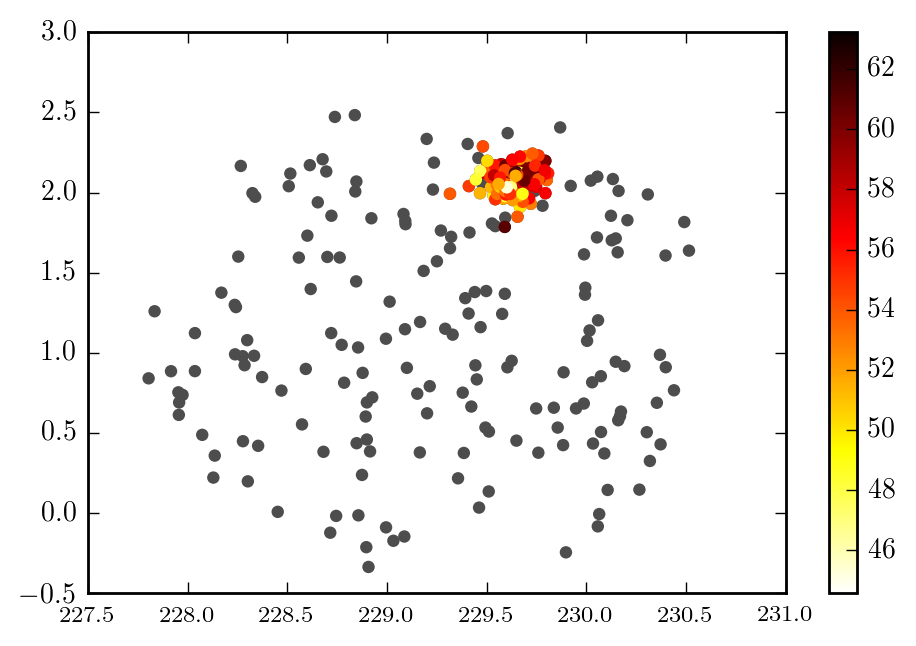

In [28]:
plt.scatter(pal5m5['RA'],pal5m5['DEC'],c='0.3',edgecolors='none')
plt.scatter(m5['RA'],m5['DEC'],edgecolors='none',c=m5['VHELIO_AVG'])
plt.colorbar()

(array([  2.,   1.,   1.,   3.,   2.,   2.,   3.,   4.,   3.,   4.,   4.,
          4.,   7.,   5.,   8.,   7.,  11.,   5.,   3.,   9.,   2.,   7.,
          2.,   3.,   6.,   4.,   2.,   4.,   2.,   1.]),
 array([ 44.57350159,  45.19523824,  45.81697489,  46.43871155,
         47.0604482 ,  47.68218486,  48.30392151,  48.92565816,
         49.54739482,  50.16913147,  50.79086812,  51.41260478,
         52.03434143,  52.65607808,  53.27781474,  53.89955139,
         54.52128805,  55.1430247 ,  55.76476135,  56.38649801,
         57.00823466,  57.62997131,  58.25170797,  58.87344462,
         59.49518127,  60.11691793,  60.73865458,  61.36039124,
         61.98212789,  62.60386454,  63.2256012 ]),
 <a list of 1 Patch objects>)

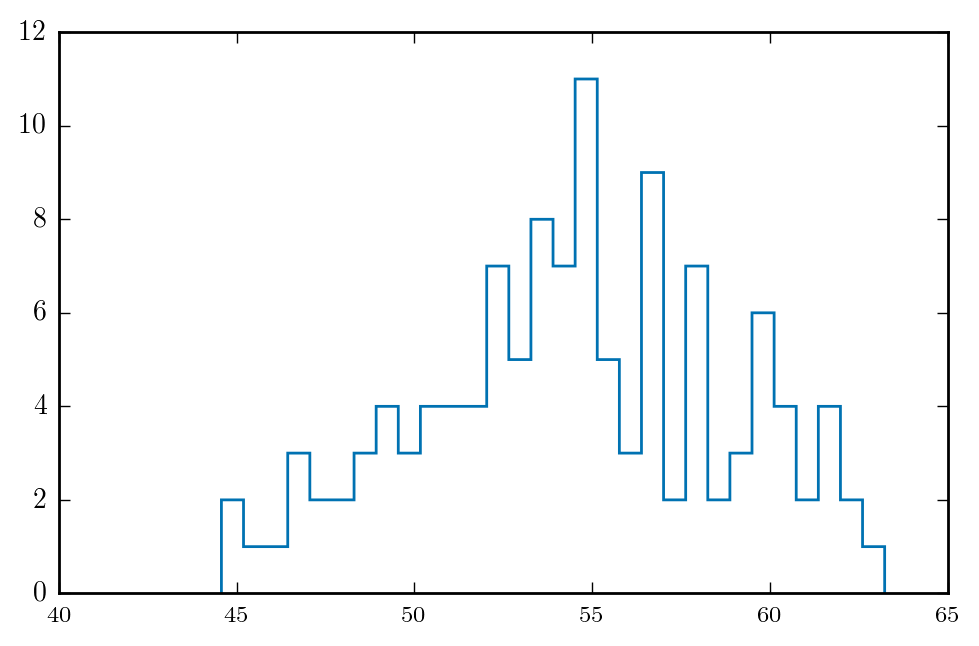

In [29]:
plt.hist(m5['VHELIO_AVG'],30,histtype="step")

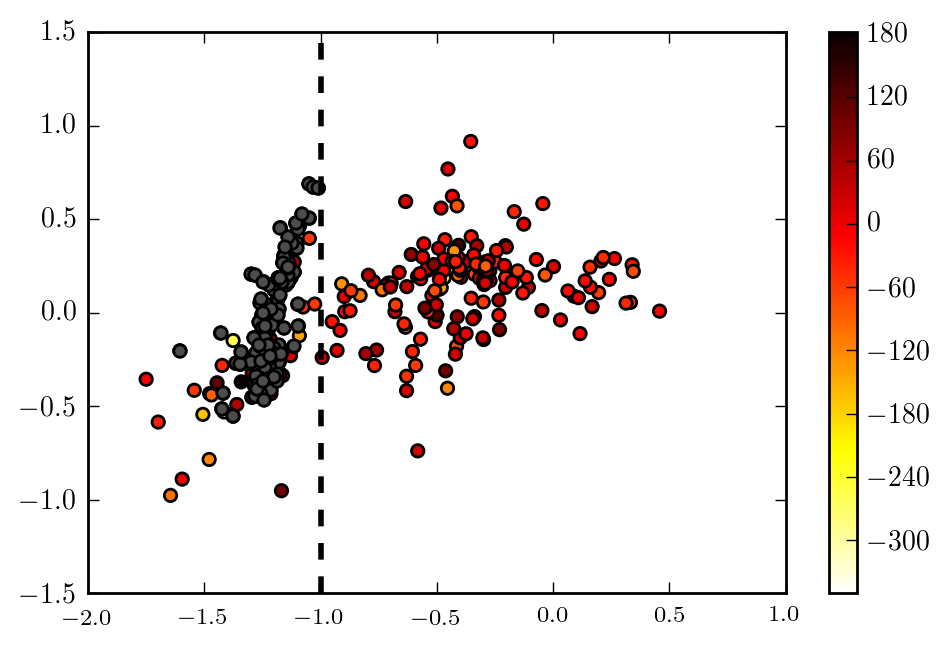

In [48]:
plt.scatter(pal5m5['FE_H'],pal5m5['AL_H']-pal5m5['MG_H'],c=pal5m5['VHELIO_AVG'])
plt.colorbar()
plt.scatter(m5['FE_H'],m5['AL_H']-m5['MG_H'],c='0.3')
plt.axvline(-1.0,ls='--',c='k')

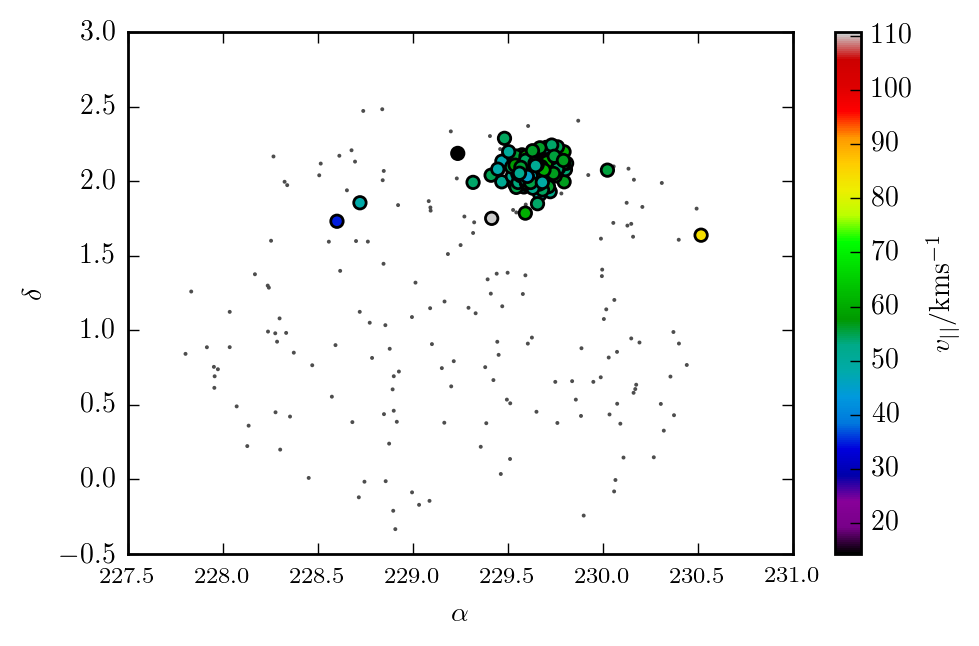

In [75]:
idx = (pal5m5['FE_H']<-1.)*(pal5m5['FE_H']>-1.5)*(pal5m5['DEC']>1.5)*(pal5m5['VHELIO_AVG']>0.)
plt.scatter(pal5m5['RA'],pal5m5['DEC'],c='0.3',edgecolors='none',s=2)
plt.scatter(m5['RA'],m5['DEC'],edgecolors='none')
plt.scatter(pal5m5['RA'][idx],pal5m5['DEC'][idx],c=pal5m5['VHELIO_AVG'][idx],cmap="spectral")
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.xlabel("$\\alpha$")
plt.ylabel("$\\delta$")
plt.savefig("/home/aamw3/Dropbox/PhD_dd/pal5/plots/m5_strip_radec.pdf")

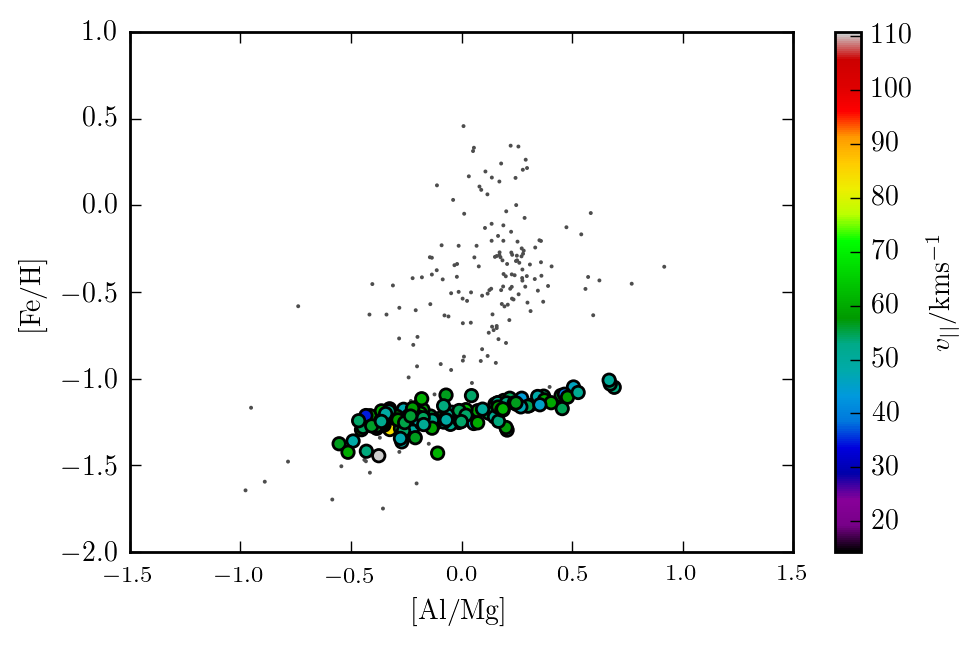

In [71]:
idx = (pal5m5['FE_H']<-1.)*(pal5m5['FE_H']>-1.5)*(pal5m5['DEC']>1.5)*(pal5m5['VHELIO_AVG']>0.)
plt.scatter(pal5m5['AL_H']-pal5m5['MG_H'],pal5m5['FE_H'],c='0.3',edgecolors='none',s=2)
plt.scatter((pal5m5['AL_H'][idx]-pal5m5['MG_H'][idx]),pal5m5['FE_H'][idx],c=pal5m5['VHELIO_AVG'][idx],cmap="spectral")
plt.colorbar(label="$v_{||}/\\mathrm{kms^{-1}}$")
plt.xlabel("$\\mathrm{[Al/Mg]}$")
plt.ylabel("$\\mathrm{[Fe/H]}$")
plt.savefig("/home/aamw3/Dropbox/PhD_dd/pal5/plots/m5_strip_almgfeh.pdf")

(array([  1.,   0.,   3.,  41.,  81.,   2.,   0.,   1.,   0.,   1.]),
 array([  14.35459995,   23.98443995,   33.61427994,   43.24411993,
          52.87395992,   62.50379992,   72.13363991,   81.7634799 ,
          91.39331989,  101.02315989,  110.65299988]),
 <a list of 10 Patch objects>)

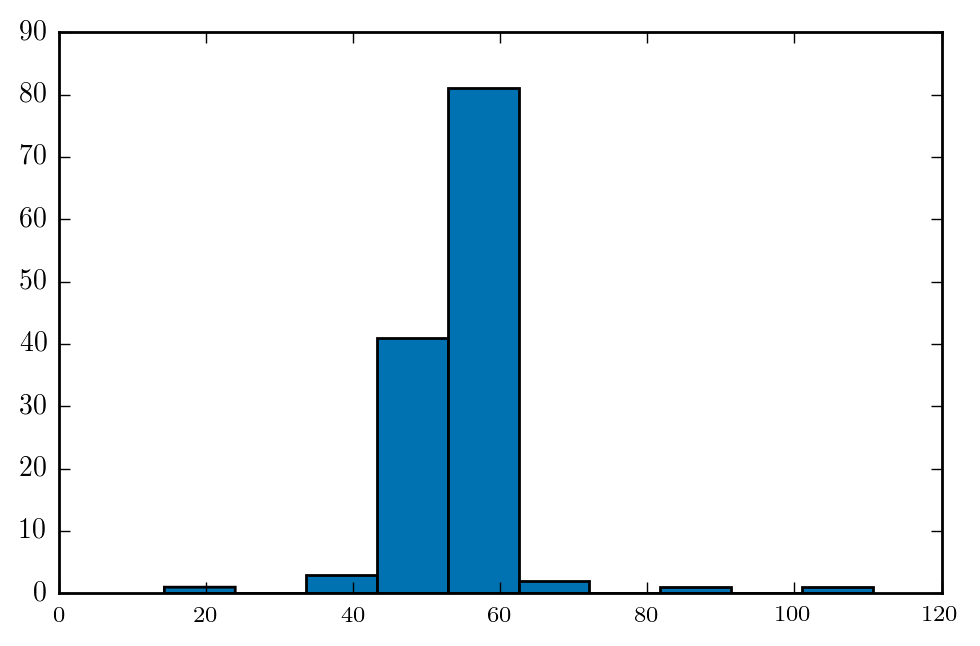

In [72]:
plt.hist(pal5m5['VHELIO_AVG'][idx])